# **Titanic Survival Prediction: A Machine Learning Approach**

### Importing necessary Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Reading and Exploring the dataset

In [141]:
# Load the data
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking Basic Info about the dataset

In [142]:
df.shape

(891, 12)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [145]:
total_missingValues_in_df=df.isnull().sum().sum()
print(f'Total missing values in the DataFrame: {total_missingValues_in_df}')

Total missing values in the DataFrame: 866


In [146]:
# total percent of null values in entire dataset
totalNullValues=df.isnull().sum().sum()
totalValuesindf=df.shape[0]*df.shape[1]
percentNullValues=(totalNullValues/totalValuesindf)*100
print(f'Percentage of null values in the DataFrame: {percentNullValues:.2f}%')

Percentage of null values in the DataFrame: 8.10%


In [147]:
# finding percentage of null values in entire dataset
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [148]:
# total of not null values in dataset
df.notnull().sum().sum()

np.int64(9826)

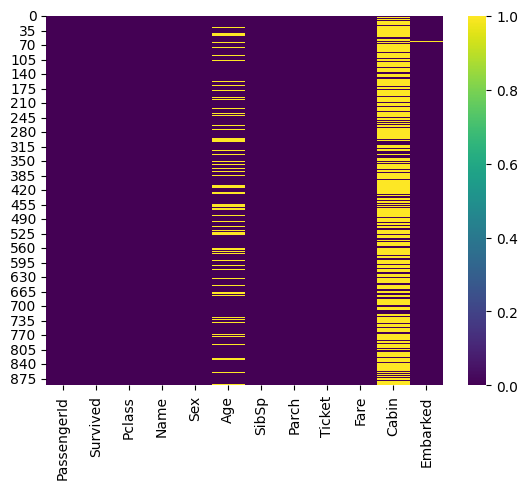

In [149]:
# showing null values through a heatmap
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

Dropping the column Cabin as it contains more than 50% null values

In [150]:
# drooping the Cabin column
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [151]:
si_imput=SimpleImputer(strategy='median')
df['Age']=si_imput.fit_transform(df[['Age']])
print('Missing values filled in Age column using median imputation')

Missing values filled in Age column using median imputation


In [152]:
imputeEmbarked = SimpleImputer(strategy='most_frequent')
# .ravel() converts the resulting 2D array into a 1D array that matches the shape of a Series.
df['Embarked'] = imputeEmbarked.fit_transform(df[['Embarked']]).ravel()
print('Missing values filled in Embarked column using most frequent imputation')

Missing values filled in Embarked column using most frequent imputation


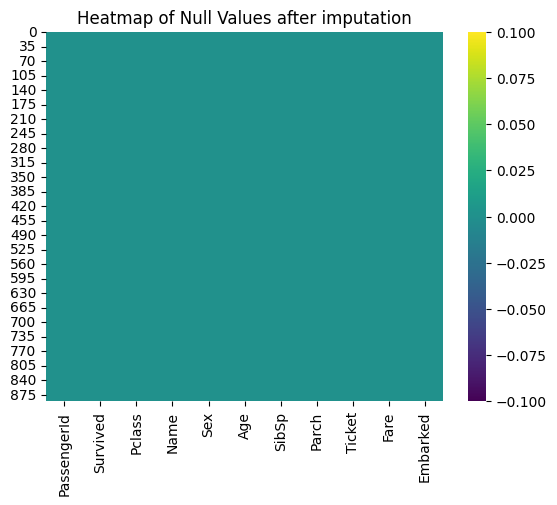

In [153]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Heatmap of Null Values after imputation')
plt.show()

In [154]:
# Dropping irrelevant columns
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


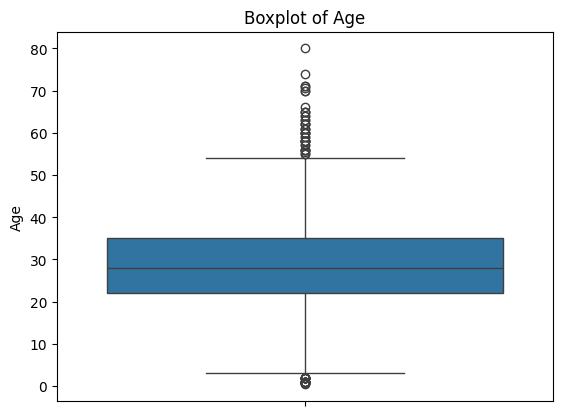

In [155]:
# checking for outliers in Age SibSp Parch Fare
sns.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.show()



In [156]:
# Removing outliers from Age
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df['Age']>lower_bound)&(df['Age']<upper_bound)]
print('Outliers removed from Age')

Outliers removed from Age


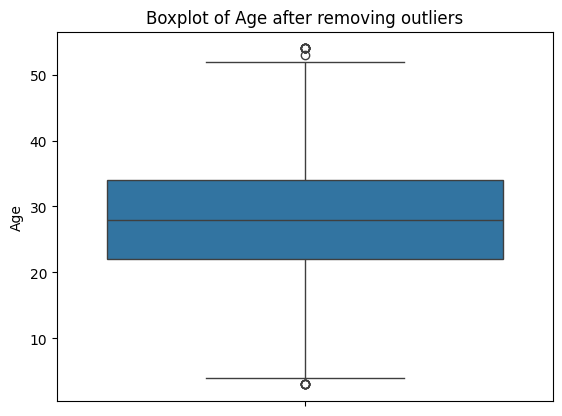

In [157]:
sns.boxplot(df['Age'])
plt.title('Boxplot of Age after removing outliers')
plt.show()

### Label Encoding Sex and Embarked column

In [158]:
# label encoding
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [159]:
# creating a new column 'FamilySize'
df['FamilySize']=df['SibSp']+df['Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


### Splitting the data

In [160]:
# splitting the model
X = df.drop('Survived', axis=1)
y = df['Survived']


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (660, 8)
X_test shape: (165, 8)
y_train shape: (660,)
y_test shape: (165,)


In [162]:
# using Standard Scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [163]:
y_pred=model_lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 81.21212121212122
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        99
           1       0.76      0.77      0.77        66

    accuracy                           0.81       165
   macro avg       0.80      0.81      0.80       165
weighted avg       0.81      0.81      0.81       165



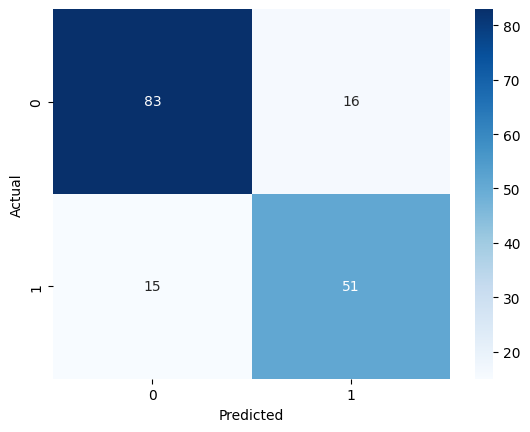

In [164]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 78.78787878787878
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        99
           1       0.71      0.79      0.75        66

    accuracy                           0.79       165
   macro avg       0.78      0.79      0.78       165
weighted avg       0.79      0.79      0.79       165



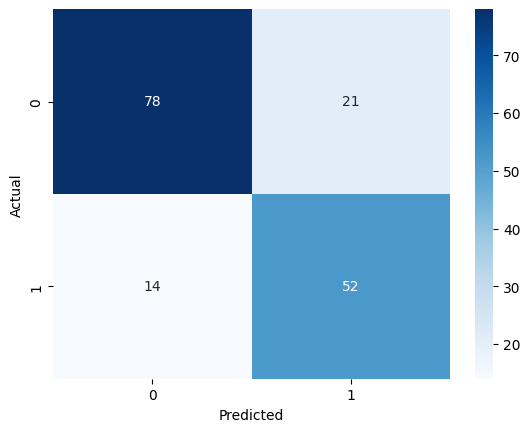

In [165]:
# decision tree model
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred=model_dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('Classification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 81.81818181818183
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        99
           1       0.77      0.77      0.77        66

    accuracy                           0.82       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.82      0.82      0.82       165



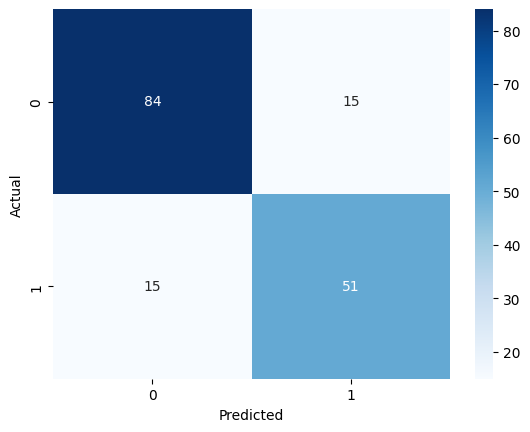

In [166]:
# random Forest model
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('Classification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 79.39393939393939
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.77      0.70      0.73        66

    accuracy                           0.79       165
   macro avg       0.79      0.78      0.78       165
weighted avg       0.79      0.79      0.79       165



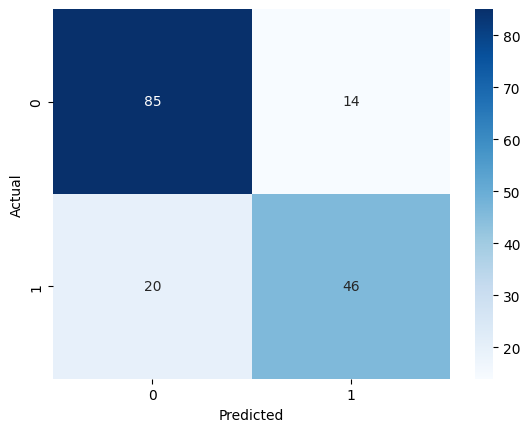

In [167]:
# KNN model
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('Classification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Accuracy report
* Logistic Regression -->81%
* Decision Tree       -->78%
* Random Forest       -->81%
* KNeighborsClassifier -->79%